In [5]:
import numpy as np
import pandas as pd
import surfboard.feature_extraction as surf
import os
from statsmodels.stats.anova import AnovaRM

In [9]:
files = []
for r,d,f in os.walk('audio'):
    for file in f:
        if 'wav' in file:
            files.append('audio/' + file)
        
files

['audio/16_neg.wav',
 'audio/5_neg.wav',
 'audio/4_pos.wav',
 'audio/17_pos.wav',
 'audio/21_pos.wav',
 'audio/20_neg.wav',
 'audio/10_neut.wav',
 'audio/11_neut.wav',
 'audio/20_pos.wav',
 'audio/8_neut.wav',
 'audio/9_neut.wav',
 'audio/21_neg.wav',
 'audio/2_neut.wav',
 'audio/3_neut.wav',
 'audio/17_neg.wav',
 'audio/4_neg.wav',
 'audio/5_pos.wav',
 'audio/16_pos.wav',
 'audio/17_neut.wav',
 'audio/16_neut.wav',
 'audio/22_pos.wav',
 'audio/23_neg.wav',
 'audio/6_neg.wav',
 'audio/5_neut.wav',
 'audio/4_neut.wav',
 'audio/15_neg.wav',
 'audio/14_pos.wav',
 'audio/7_pos.wav',
 'audio/23_neut.wav',
 'audio/22_neut.wav',
 'audio/7_neg.wav',
 'audio/14_neg.wav',
 'audio/15_pos.wav',
 'audio/6_pos.wav',
 'audio/23_pos.wav',
 'audio/22_neg.wav',
 'audio/1_neut.wav',
 'audio/19_pos.wav',
 'audio/19_neut.wav',
 'audio/18_neut.wav',
 'audio/18_neg.wav',
 'audio/13_neut.wav',
 'audio/12_neut.wav',
 'audio/10_pos.wav',
 'audio/3_pos.wav',
 'audio/2_neg.wav',
 'audio/11_neg.wav',
 'audio/11_po

In [ ]:
waves = surf.load_waveforms_from_paths(paths=files, sample_rate=48000)

In [7]:
res = surf.extract_features(
    waves, 
    components_list=['rms','spectral_centroid', 'f0_statistics', 'hnr'],
    statistics_list=['mean', 'std', 'max', 'min']
)

Extracting features...:  17%|█▋        | 12/69 [00:19<01:30,  1.59s/it]/home/t/miniconda3/envs/projbad/lib/python3.8/site-packages/surfboard/hnr.py:81: RuntimeWarning: invalid value encountered in true_divide
  r_x = ffts_outputs[0] / ffts_outputs[1]
Extracting features...:  72%|███████▏  | 50/69 [01:21<00:32,  1.70s/it]/home/t/miniconda3/envs/projbad/lib/python3.8/site-packages/surfboard/hnr.py:81: RuntimeWarning: divide by zero encountered in true_divide
  r_x = ffts_outputs[0] / ffts_outputs[1]
/home/t/miniconda3/envs/projbad/lib/python3.8/site-packages/peakutils/peak.py:43: RuntimeWarning: invalid value encountered in double_scalars
  thres = thres * (np.max(y) - np.min(y)) + np.min(y)
Extracting features...: 100%|██████████| 69/69 [01:52<00:00,  1.62s/it]


In [9]:
def get_subject(filepath):
    subject = filepath[6]
    return subject
    
def get_condition(filepath):
    # cut unitl the end
    cond = filepath[8:]
     #cut extension
    cond = cond[:-4]
    return cond
    

res['filename'] = files
res['subject'] = res.filename.apply(get_subject)
res['condition'] = res.filename.apply(get_condition)

In [10]:
res

,rms_mean,rms_std,rms_max,rms_min,spectral_centroid_mean,spectral_centroid_std,spectral_centroid_max,spectral_centroid_min,f0_mean,f0_std,hnr,filename,subject,condition
0,0.017931,0.019250,0.111144,0.000203,5218.405863,3701.905250,12518.859817,856.716248,176.649887,22.951265,11.798376,audio/2_pos.wav,2,pos
1,0.024871,0.032905,0.168227,0.000037,4086.316251,3594.997320,12407.049863,502.148145,201.147730,25.017070,11.505237,audio/14_neg.wav,1,_neg
2,0.038053,0.038166,0.169753,0.000274,4187.967438,3184.686156,10437.066596,647.503530,227.516987,23.271600,14.403130,audio/19_neg.wav,1,_neg
3,0.018055,0.025417,0.169625,0.000212,4355.275424,2692.859851,10093.267784,740.981182,182.849631,31.212020,10.530582,audio/18_neut.wav,1,_neut
4,0.086125,0.077493,0.266395,0.000146,3963.296414,3355.119113,11468.070704,490.182811,190.461634,23.039585,13.209085,audio/7_neg.wav,7,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.093767,0.101875,0.450404,0.000025,2413.748359,2092.859075,7593.803735,430.525238,211.911909,20.094876,12.022375,audio/3_neut.wav,3,neut
65,0.025872,0.035865,0.222988,0.000027,4426.952284,3569.551386,11228.892341,513.289965,204.992579,27.863604,11.687023,audio/14_pos.wav,1,_pos
66,0.007521,0.009095,0.048909,0.000004,4882.187457,3634.501499,11562.187644,612.290145,192.226669,22.582565,10.004964,audio/8_neut.wav,8,neut
67,0.022345,0.031470,0.201110,0.000220,4342.488783,2747.557552,9400.819519,559.169883,187.722206,32.186628,10.857767,audio/18_neg.wav,1,_neg


In [11]:
res.to_csv('features_do_obrobki_centroid.csv',index=False, header=True)

In [6]:
df = pd.read_csv('features_do_obrobki_centroid.csv')

In [15]:
df.isna().sum()

rms_mean                  0
rms_std                   0
rms_max                   0
rms_min                   0
spectral_centroid_mean    0
spectral_centroid_std     0
spectral_centroid_max     0
spectral_centroid_min     0
f0_mean                   0
f0_std                    0
hnr                       0
filename                  0
subject                   0
condition                 0
dtype: int64

#### features_do_obrobki_centroid dziala

In [7]:
import pingouin as pg
import seaborn as sns

In [41]:
pg.rm_anova(data=df, dv='spectral_centroid_mean', within='condition', subject='subject', correction=True)

,Source,ddof1,ddof2,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,condition,2,44,1.993454,0.14834,0.152579,0.083083,0.919158,True,0.912048,0.380353


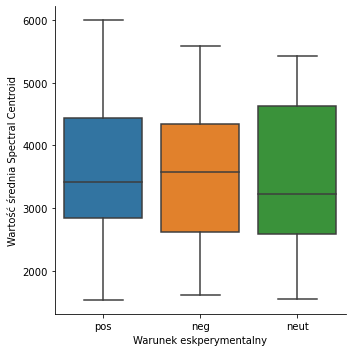

In [8]:
centroid_plot = sns.catplot(x='condition', y='spectral_centroid_mean', data=df, kind='box')
centroid_plot.set(xlabel="Warunek eskperymentalny", ylabel = "Wartość średnia Spectral Centroid")

In [9]:
centroid_plot.savefig("centroid_boxplot.png")

In [32]:
df.groupby(df['condition']).mean()

,rms_mean,rms_std,rms_max,rms_min,spectral_centroid_mean,spectral_centroid_std,spectral_centroid_max,spectral_centroid_min,f0_mean,f0_std,hnr,subject
condition,,,,,,,,,,,,
neg,0.061282,0.064787,0.289398,0.000089,3484.646237,2669.702784,9998.740425,468.759345,197.444540,25.917267,11.674868,12
neut,0.058890,0.063585,0.276021,0.000075,3571.359373,2728.867775,10117.407109,485.328594,197.256972,26.005058,11.641003,12
pos,0.059002,0.063985,0.287508,0.000077,3604.205855,2680.730190,10006.494860,461.473738,198.388218,26.454598,11.800141,12


In [33]:
df.groupby(df['condition']).median()

,rms_mean,rms_std,rms_max,rms_min,spectral_centroid_mean,spectral_centroid_std,spectral_centroid_max,spectral_centroid_min,f0_mean,f0_std,hnr,subject
condition,,,,,,,,,,,,
neg,0.064600,0.077493,0.315176,0.000041,3571.391556,2656.135554,10878.138980,483.851591,197.872192,25.017070,11.597605,12
neut,0.066898,0.072928,0.316067,0.000035,3227.419346,2586.191026,11085.081514,457.845835,198.413973,24.557532,11.682766,12
pos,0.069010,0.078391,0.343143,0.000042,3420.125622,2564.890477,10588.773632,441.168459,200.647060,25.221915,11.794855,12


In [44]:
art_mean = df[['f0_mean', 'hnr','rms_mean', 'condition', 'spectral_centroid_mean']].groupby(df['condition']).std()

In [45]:
print(art_mean.to_markdown())

| condition   |   f0_mean |     hnr |   rms_mean |   spectral_centroid_mean |
|:------------|----------:|--------:|-----------:|-------------------------:|
| neg         |   13.1644 | 1.48125 |  0.0347097 |                  1099.31 |
| neut        |   13.2095 | 1.66784 |  0.0360501 |                  1167.7  |
| pos         |   11.501  | 1.81293 |  0.0341061 |                  1203.43 |
